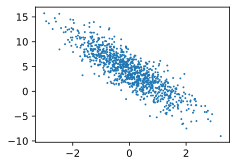

In [4]:
# %load linear_regression.py
import torch
from IPython import display
from matplotlib import pyplot as plt
import numpy as np
import random

num_inputs = 2
num_examples = 1000
true_w = [2, -3.4]
true_b = 4.2
features = torch.from_numpy(np.random.normal(0, 1, (num_examples, num_inputs)))
labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b
labels += torch.from_numpy(np.random.normal(0, 0.01, size=labels.size()))


def use_svg_display():
    # ⽤⽮量图显示
    display.set_matplotlib_formats('svg')


def set_figsize(figsize=(3.5, 2.5)):
    use_svg_display()
    # 设置图的尺⼨
    plt.rcParams['figure.figsize'] = figsize


def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)  # 样本的读取顺序是随机的
    for i in range(0, num_examples, batch_size):
        j = torch.LongTensor(indices[i: min(i + batch_size, num_examples)])  # 最后⼀次可能不⾜⼀个batch
    yield features.index_select(0, j), labels.index_select(0, j)

def linreg(X, w, b):
    return torch.mm(X, w) + b

def squared_loss(y_hat, y):
    return (y_hat - y.view(y_hat.size())) ** 2 / 2

def sgd(params, lr, batch_size):
    for param in params:
        param.data -= lr * param.grad / batch_size


set_figsize()
plt.scatter(features[:, 1].numpy(), labels.numpy(), 1)
